In [1]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_brokers"
]

In [2]:
sys.path += paths


In [3]:
# !pip install elasticsearch-dsl

In [4]:
# !pip install psycopg2-binary

In [5]:

from pandas.io import sql as psql

In [6]:
from lib.connected_db import PgsqlExecutor

In [7]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "df_user",
        "credentials": "Piq914sT",
        "database": "datafactory"
      }

In [8]:
db = PgsqlExecutor(research_db)


In [9]:
sql = """

select * from model.dcf_values where is_active = 1 and total_years = 5 order by symbol, fiscal_year, created desc 
"""
data = db.get_dataframe(sql)
data.head()


id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   68991      A           NYSE        2587460          1          24.10   
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.897                -1.470      0.36   
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   

   fiscal_year pricingdate  total_years  market_dcf    dcf  adjusted_dcf  \
0         2004  2004-12-31            5        23.9    0.1           0.0   
1         2005  2005-12-31            5        31.4  165.1          69.3   
2         2006  2006-12-31            5        38.6  338.1          38.1   
3         2007  2007-12-31            5        44.7  320.6          43.7   
4         2008  2008-12-31            5        26.2  431.9         134.5   

  error                    created  
0       2020-06-13 02:28:03.388154  
1       2020-06-13 04:33:14.349904  
2       2020-06-13 02:27:57.251447  
3       2020-06-13 04:52:13.230892  
4       2020-06-13 02:27:51.389375

In [10]:
data.shape

(30192, 18)

In [11]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [12]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1) 
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)
data.loc[:, 'last_variance'] = shifted_by(data['variance'], 1) 
data.loc[:, 'last_adjust_growth'] = shifted_by(data['adjusted_growth_rate'], 1) 
data.loc[:, 'last_adjusted_dcf'] = shifted_by(data['adjusted_dcf'], 1)




In [13]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   68991      A           NYSE        2587460          1          24.10   
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.897                -1.470      0.36   
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   

   ...                    created last_symbol  last_price  last_growth_rate  \
0  ... 2020-06-13 02:28:03.388154         NaN         NaN               NaN   
1  ... 2020-06-13 04:33:14.349904           A       24.10            -0.897   
2  ... 2020-06-13 02:27:57.251447           A       33.29             1.576   
3  ... 2020-06-13 04:52:13.230892           A       34.85             1.925   
4  ... 2020-06-13 02:27:51.389375           A       36.74             1.718   

   last_fiscal_year  last_market_dcf last_dcf last_variance  \
0               NaN              NaN      NaN           NaN   
1            2004.0             23.9      0.1          0.36   
2            2005.0             31.4    165.1          0.63   
3            2006.0             38.6    338.1          0.03   
4            2007.0             44.7    320.6          0.03   

  last_adjust_growth  last_adjusted_dcf  
0                NaN                NaN  
1             -1.470                0.0  
2              0.986               69.3  
3              0.064               38.1  
4              0.045               43.7  

[5 rows x 27 columns]

In [14]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["adjusted_dcf_to_price"] = (data["last_adjusted_dcf"] - data["last_price"]) * 100 / data["last_price"]




In [15]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   68991      A           NYSE        2587460          1          24.10   
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.897                -1.470      0.36   
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   

   ...  price_change direction  correct  fiscal_change  growth_changes  \
0  ...           NaN        -1    False            NaN             NaN   
1  ...          9.19         1     True            1.0           2.473   
2  ...          1.56         1     True            1.0           0.349   
3  ...          1.89         1     True            1.0          -0.207   
4  ...        -21.11        -1     True            1.0           0.156   

   market_dcf_change  dcf_change dcf_to_price market_dcf_to_price  \
0                NaN         NaN          NaN                 NaN   
1          31.120332  684.647303   -99.585062           -0.829876   
2          21.628117  519.675578   395.944728           -5.677381   
3          17.503587  -50.215208   870.157819           10.760402   
4         -50.353838  302.939575   772.618400           21.665759   

   adjusted_dcf_to_price  
0                    NaN  
1            -100.000000  
2             108.170622  
3               9.325681  
4              18.943930  

[5 rows x 37 columns]

In [16]:
data = data.iloc[1:, :]
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   
5  112575      A           NYSE        2587460          1          31.07   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   
5               0.095               -0.084                -0.167      0.00   

   ...  price_change direction  correct  fiscal_change  growth_changes  \
1  ...          9.19         1     True            1.0           2.473   
2  ...          1.56         1     True            1.0           0.349   
3  ...          1.89         1     True            1.0          -0.207   
4  ...        -21.11        -1     True            1.0           0.156   
5  ...         15.44         1     True            1.0          -1.958   

   market_dcf_change   dcf_change dcf_to_price market_dcf_to_price  \
1          31.120332   684.647303   -99.585062           -0.829876   
2          21.628117   519.675578   395.944728           -5.677381   
3          17.503587   -50.215208   870.157819           10.760402   
4         -50.353838   302.939575   772.618400           21.665759   
5          90.850928 -2074.216251  2663.275752           67.626360   

   adjusted_dcf_to_price  
1            -100.000000  
2             108.170622  
3               9.325681  
4              18.943930  
5             760.524632  

[5 rows x 37 columns]

In [17]:
import copy

In [18]:
new_data = copy.deepcopy(data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)&(data["total_years"] == 5)])

In [19]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]

new_data.shape

(23757, 38)

In [20]:
new_data = new_data.dropna()
new_data.shape

(23736, 38)

In [21]:
## increase the value of growth rate to 100
new_data['last_growth_rate'] = new_data['last_growth_rate'] * 100
new_data['last_adjust_growth'] = new_data['last_adjust_growth'] * 100
new_data['last_variance'] = new_data['last_variance'] * 100




In [22]:
new_data[['last_growth_rate', 'last_adjust_growth', 'last_variance']].head()

last_growth_rate  last_adjust_growth  last_variance
1             -89.7              -147.0           36.0
2             157.6                98.6           63.0
3             192.5                 6.4            3.0
4             171.8                 4.5            3.0
5             187.4               114.8           61.0

In [23]:
new_data["last_variance"].describe()

count    23736.000000
mean        25.373483
std         22.416571
min          0.000000
25%          5.000000
50%         18.000000
75%         46.000000
max         70.000000
Name: last_variance, dtype: float64

(array([2727., 1694., 1551.,  854., 1628., 1039.,  806.,  347.,  613.,
         585.,  532.,  219.,  448.,  437.,  445.,  209.,  418.,  417.,
         407.,  218.,  378.,  371.,  354.,  209.,  392.,  396.,  402.,
         193.,  400.,  429.,  443.,  241.,  565.,  678.,  863.,  269.,
         488.,  443.,  363.,  265.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  , 36.75, 38.5 , 40.25, 42.  , 43.75, 45.5 ,
        47.25, 49.  , 50.75, 52.5 , 54.25, 56.  , 57.75, 59.5 , 61.25,
        63.  , 64.75, 66.5 , 68.25, 70.  ]),
 <a list of 40 Patch objects>)

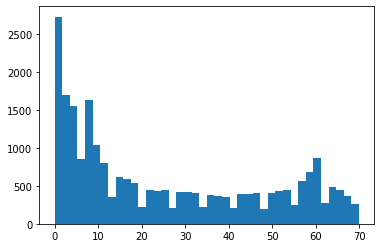

In [24]:
import matplotlib.pyplot as plt

plt.hist(new_data["last_variance"].values, bins=40)

In [25]:
new_data[new_data["price_change_perf"] > 30]["last_variance"].describe()

count    5988.000000
mean       25.863727
std        22.509077
min         0.000000
25%         6.000000
50%        19.000000
75%        47.000000
max        70.000000
Name: last_variance, dtype: float64

(array([668., 436., 376., 210., 392., 257., 190.,  92., 155., 136., 129.,
         61., 133., 123., 117.,  46.,  90., 113.,  92.,  50., 102., 113.,
         90.,  49.,  89., 101., 109.,  57.,  96.,  97., 122.,  73., 139.,
        189., 228.,  72., 119., 119.,  96.,  62.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  , 36.75, 38.5 , 40.25, 42.  , 43.75, 45.5 ,
        47.25, 49.  , 50.75, 52.5 , 54.25, 56.  , 57.75, 59.5 , 61.25,
        63.  , 64.75, 66.5 , 68.25, 70.  ]),
 <a list of 40 Patch objects>)

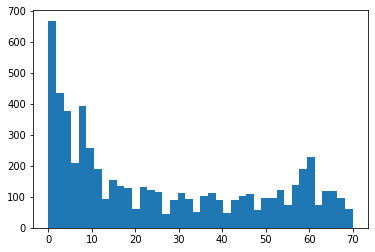

In [26]:
import matplotlib.pyplot as plt

plt.hist(new_data[new_data["price_change_perf"] > 30]["last_variance"].values, bins=40)

(array([552., 334., 329., 192., 351., 199., 157.,  75., 134., 131., 103.,
         44.,  82.,  90., 101.,  41.,  90.,  92.,  90.,  54.,  72.,  73.,
         69.,  41.,  81., 102.,  83.,  37.,  97.,  95., 100.,  51., 119.,
        166., 204.,  57., 102.,  90.,  68.,  50.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  , 36.75, 38.5 , 40.25, 42.  , 43.75, 45.5 ,
        47.25, 49.  , 50.75, 52.5 , 54.25, 56.  , 57.75, 59.5 , 61.25,
        63.  , 64.75, 66.5 , 68.25, 70.  ]),
 <a list of 40 Patch objects>)

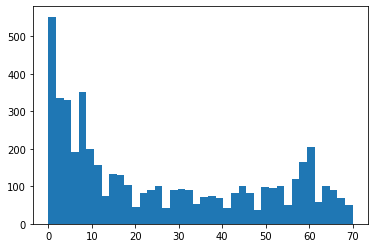

In [27]:
import matplotlib.pyplot as plt

plt.hist(new_data[new_data["price_change_perf"] < -30]["last_variance"].values, bins=40)

In [28]:
## Adjust growth rate
new_data["last_adjust_growth"].describe()

count    2.373600e+04
mean    -5.185273e+02
std      1.677456e+04
min     -1.879822e+06
25%     -2.136000e+02
50%      1.000000e-01
75%      9.200000e+00
max      1.677701e+05
Name: last_adjust_growth, dtype: float64

(array([  43.,   37.,   45.,   45.,   47.,   41.,   43.,   49.,   52.,
          51.,   58.,   62.,   56.,   61.,   73.,   64.,   58.,   73.,
          71.,   79.,   95.,   95.,   76.,   87.,   62., 2894., 1122.,
         772.,  554.,  498.,  412.,  347.,  309.,  276.,  211.,  206.,
         188.,  194.,  168.,  155.,  126.,  134.,  101.,  121.,  123.,
          98.,   95.,  100.,   79.,   84.]),
 array([-29.9  , -28.704, -27.508, -26.312, -25.116, -23.92 , -22.724,
        -21.528, -20.332, -19.136, -17.94 , -16.744, -15.548, -14.352,
        -13.156, -11.96 , -10.764,  -9.568,  -8.372,  -7.176,  -5.98 ,
         -4.784,  -3.588,  -2.392,  -1.196,   0.   ,   1.196,   2.392,
          3.588,   4.784,   5.98 ,   7.176,   8.372,   9.568,  10.764,
         11.96 ,  13.156,  14.352,  15.548,  16.744,  17.94 ,  19.136,
         20.332,  21.528,  22.724,  23.92 ,  25.116,  26.312,  27.508,
         28.704,  29.9  ]),
 <a list of 50 Patch objects>)

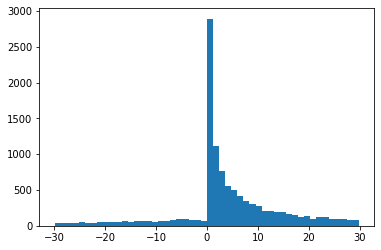

In [29]:
import matplotlib.pyplot as plt

plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
]["last_adjust_growth"].values, bins=50)

(array([  19.,   19.,   26.,   19.,   23.,   23.,   33.,   32.,   18.,
          24.,   29.,   32.,   31.,   37.,   40.,   45.,   30.,   45.,
          32.,   50.,   45.,   51.,   38.,   57.,   36., 1670.,  675.,
         437.,  309.,  292.,  234.,  198.,  170.,  171.,  112.,  116.,
          94.,  113.,  101.,   86.,   51.,   65.,   56.,   68.,   72.,
          46.,   51.,   58.,   43.,   43.]),
 array([-29.9  , -28.704, -27.508, -26.312, -25.116, -23.92 , -22.724,
        -21.528, -20.332, -19.136, -17.94 , -16.744, -15.548, -14.352,
        -13.156, -11.96 , -10.764,  -9.568,  -8.372,  -7.176,  -5.98 ,
         -4.784,  -3.588,  -2.392,  -1.196,   0.   ,   1.196,   2.392,
          3.588,   4.784,   5.98 ,   7.176,   8.372,   9.568,  10.764,
         11.96 ,  13.156,  14.352,  15.548,  16.744,  17.94 ,  19.136,
         20.332,  21.528,  22.724,  23.92 ,  25.116,  26.312,  27.508,
         28.704,  29.9  ]),
 <a list of 50 Patch objects>)

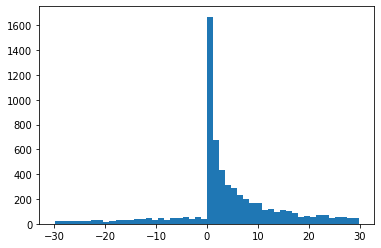

In [30]:
plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
    & (new_data["direction"] == 1)
]["last_adjust_growth"].values, bins=50)

(array([  24.,   18.,   19.,   26.,   24.,   18.,   10.,   17.,   34.,
          27.,   29.,   30.,   25.,   24.,   33.,   19.,   28.,   28.,
          39.,   29.,   50.,   44.,   38.,   30.,   26., 1224.,  447.,
         335.,  245.,  206.,  178.,  149.,  139.,  105.,   99.,   90.,
          94.,   81.,   67.,   69.,   75.,   69.,   45.,   53.,   51.,
          52.,   44.,   42.,   36.,   41.]),
 array([-29.9  , -28.704, -27.508, -26.312, -25.116, -23.92 , -22.724,
        -21.528, -20.332, -19.136, -17.94 , -16.744, -15.548, -14.352,
        -13.156, -11.96 , -10.764,  -9.568,  -8.372,  -7.176,  -5.98 ,
         -4.784,  -3.588,  -2.392,  -1.196,   0.   ,   1.196,   2.392,
          3.588,   4.784,   5.98 ,   7.176,   8.372,   9.568,  10.764,
         11.96 ,  13.156,  14.352,  15.548,  16.744,  17.94 ,  19.136,
         20.332,  21.528,  22.724,  23.92 ,  25.116,  26.312,  27.508,
         28.704,  29.9  ]),
 <a list of 50 Patch objects>)

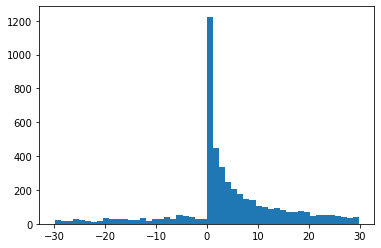

In [31]:
plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
    & (new_data["direction"] == -1)
]["last_adjust_growth"].values, bins=50)

In [32]:
import numpy as np
import pandas as pd

In [33]:
# csv_file = "./make_dcf_model_0605.csv"
# data = pd.read_csv(csv_file, header=0, index_col=0)

In [34]:


features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price", "last_variance", 
            "last_adjust_growth", "last_adjusted_dcf", "adjusted_dcf_to_price"
           ]

X = new_data[features].values
Y = (new_data.loc[:, 'price_change_perf'].values) 

In [35]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
# !pip3 install sklearn

In [37]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [39]:
len(X_train), len(X_test)

(15903, 7833)

In [45]:
# !pip3 install matplotlib

(array([7.801e+03, 2.000e+01, 6.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ -100.        ,   689.28571429,  1478.57142857,  2267.85714286,
         3057.14285714,  3846.42857143,  4635.71428571,  5425.        ,
         6214.28571429,  7003.57142857,  7792.85714286,  8582.14285714,
         9371.42857143, 10160.71428571, 10950.        , 11739.28571429,
        12528.57142857, 13317.85714286, 14107.14285714, 14896.42857143,
        15685.71428571, 16475.        , 17264.28571429, 18053.57142857,
        18842.85714286, 19632.14285714, 20421.42857143, 21210.71428571

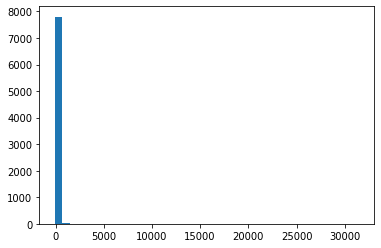

In [40]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=40)

In [41]:
filtered_outliner = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [42]:
features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price", "last_variance", 
            "last_adjust_growth", "last_adjusted_dcf", "adjusted_dcf_to_price"
           ]

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 43.,  43.,  49.,  51.,  67.,  95., 103., 109., 127., 144., 131.,
        184., 198., 234., 252., 291., 327., 335., 376., 414., 434., 438.,
        430., 372., 301., 278., 242., 211., 188., 139., 129., 111., 107.,
         91.,  73.,  69.,  45.,  46.,  27.,  37.]),
 array([-99.99333333, -95.00018896, -90.00704459, -85.01390022,
        -80.02075585, -75.02761148, -70.03446711, -65.04132274,
        -60.04817837, -55.055034  , -50.06188963, -45.06874526,
        -40.07560089, -35.08245652, -30.08931215, -25.09616778,
        -20.10302341, -15.10987904, -10.11673467,  -5.1235903 ,
         -0.13044593,   4.86269844,   9.85584281,  14.84898718,
         19.84213155,  24.83527592,  29.82842029,  34.82156466,
         39.81470903,  44.8078534 ,  49.80099777,  54.79414214,
         59.78728651,  64.78043088,  69.77357525,  74.76671962,
         79.75986399,  84.75300836,  89.74615273,  94.7392971 ,
         99.73244147]),
 <a list of 40 Patch objects>)

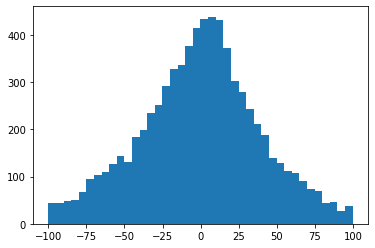

In [43]:
plt.hist(y_test, bins=40)

(array([ 144.,  130.,  139.,  190.,  245.,  289.,  338.,  350.,  399.,
         417.,  470.,  532.,  651.,  689.,  737.,  845.,  977., 1013.,
        1162., 1222., 1333., 1245., 1263., 1112.,  977.,  865.,  727.,
         611.,  568.,  466.,  378.,  322.,  302.,  245.,  191.,  178.,
         174.,  142.,  107.,   99.]),
 array([-9.99993802e+01, -9.49998586e+01, -9.00003370e+01, -8.50008154e+01,
        -8.00012939e+01, -7.50017723e+01, -7.00022507e+01, -6.50027291e+01,
        -6.00032075e+01, -5.50036859e+01, -5.00041643e+01, -4.50046428e+01,
        -4.00051212e+01, -3.50055996e+01, -3.00060780e+01, -2.50065564e+01,
        -2.00070348e+01, -1.50075133e+01, -1.00079917e+01, -5.00847009e+00,
        -8.94850067e-03,  4.99057308e+00,  9.99009467e+00,  1.49896163e+01,
         1.99891378e+01,  2.49886594e+01,  2.99881810e+01,  3.49877026e+01,
         3.99872242e+01,  4.49867458e+01,  4.99862673e+01,  5.49857889e+01,
         5.99853105e+01,  6.49848321e+01,  6.99843537e+01,  7.49838753

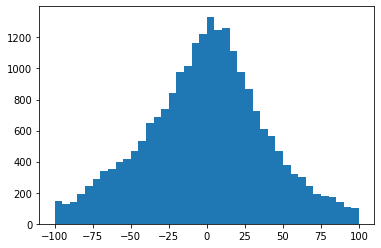

In [44]:
plt.hist(Y, bins=40)

In [45]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred = model.predict(X_test)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 9.000e+00, 1.400e+01, 1.200e+01,
        1.900e+01, 4.100e+01, 5.600e+01, 5.700e+01, 8.700e+01, 1.070e+02,
        1.580e+02, 2.000e+02, 2.550e+02, 3.830e+02, 4.900e+02, 5.800e+02,
        8.150e+02, 9.920e+02, 1.146e+03, 9.400e+02, 5.110e+02, 2.280e+02,
        1.140e+02, 5.600e+01, 2.700e+01, 9.000e+00, 1.200e+01, 7.000e+00,
        3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([-106.154396  , -101.89766   ,  -97.64092   ,  -93.384186  ,
         -89.12744   ,  -84.870705  ,  -80.61397   ,  -76.35723   ,
         -72.100494  ,  -67.84376   ,  -63.58702   ,  -59.33028   ,
         -55.073544  ,  -50.816807  ,  -46.560066  ,  -42.30333   ,
         -38.046593  ,  -33.789856  ,  -29.533117  ,  -25.276379  ,
         -21.019642  ,  -16.762905  ,  -12.506166  ,   -8.249429  ,
          -3.992691  ,    0.26404667,    4.5207844 ,    8.777522  ,
          13.03426   ,   1

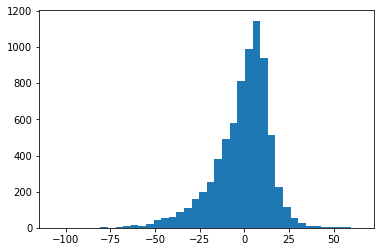

In [47]:
plt.hist(y_pred, bins=40)

In [48]:
# plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
# plt.plot(range(y_test.shape[0]), y_test, 'g-')
# plt.show()

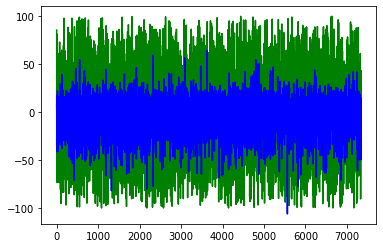

In [49]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [50]:
accuracy = accuracy_score(y_test >= 25, y_pred >= 25)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.53%


In [51]:
accuracy = accuracy_score(y_test >= 35, y_pred >= 35)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.44%


In [52]:
accuracy = accuracy_score(y_test < -20, y_pred < -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.13%


In [53]:
accuracy = accuracy_score(y_test < -40, y_pred < -35)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.48%


['last_growth_rate', 'last_market_dcf', 'last_dcf', 'dcf_to_price', 'market_dcf_to_price', 'last_variance', 'last_adjust_growth', 'last_adjusted_dcf', 'adjusted_dcf_to_price']


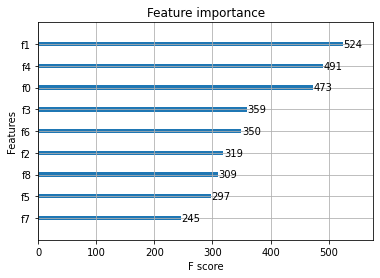

In [144]:
# # plot feature importance using built-in function
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot
# # load data
# X = data[features].values
# Y = data['direction'].values
# # fit model no training data
# model = XGBClassifier()
# model.fit(X, Y)
# # plot feature importance
# plot_importance(model)
# print (features)
# pyplot.show()

In [244]:
for index in [1,4,0,3,6, 2, 8]:
    print (features[index])

last_market_dcf
market_dcf_to_price
last_growth_rate
dcf_to_price
last_adjust_growth
last_dcf
adjusted_dcf_to_price


In [145]:
data.to_csv("make_dcf_model_0615_3rankings.csv")

In [11]:
import pickle, simplejson

In [12]:
from mapper.predict_logic_mapper import MapperPredictLogic, simplejson

In [13]:
logic_mapper = MapperPredictLogic(db)

In [68]:


dto = logic_mapper.get_dto(
name="dcf_adj",
features=simplejson.dumps(features),
logic=pickle.dumps(model)
    
)

In [69]:
logic_mapper.insert(dto, update_on_conflict="name")

update where name
update UPDATE model.predict_logic SET name = %s, features = %s, logic = %s WHERE name = %s RETURNING id, name, features, logic, created ('dcf_adj', '["last_growth_rate", "last_market_dcf", "last_dcf", "dcf_to_price", "market_dcf_to_price", "last_variance", "last_adjust_growth", "last_adjusted_dcf", "adjusted_dcf_to_price"]', b'\x80\x03cxgboost.sklearn\nXGBRegressor\nq\x00)\x81q\x01}q\x02(X\x0c\x00\x00\x00n_estimatorsq\x03KdX\t\x00\x00\x00objectiveq\x04X\x10\x00\x00\x00reg:squarederrorq\x05X\t\x00\x00\x00max_depthq\x06NX\r\x00\x00\x00learning_rateq\x07NX\t\x00\x00\x00verbosityq\x08NX\x07\x00\x00\x00boosterq\tNX\x0b\x00\x00\x00tree_methodq\nNX\x05\x00\x00\x00gammaq\x0bNX\x10\x00\x00\x00min_child_weightq\x0cNX\x0e\x00\x00\x00max_delta_stepq\rNX\t\x00\x00\x00subsampleq\x0eNX\x10\x00\x00\x00colsample_bytreeq\x0fNX\x11\x00\x00\x00colsample_bylevelq\x10NX\x10\x00\x00\x00colsample_bynodeq\x11NX\t\x00\x00\x00reg_alphaq\x12NX\n\x00\x00\x00reg_lambdaq\x13NX\x10\x00\x00\x00scale_

< DtoPredictLogic, {'id': 7, 'name': 'dcf_adj', 'features': ['last_growth_rate', 'last_market_dcf', 'last_dcf', 'dcf_to_price', 'market_dcf_to_price', 'last_variance', 'last_adjust_growth', 'last_adjusted_dcf', 'adjusted_dcf_to_price'], 'logic': <memory at 0x13d899588>, 'created': datetime.datetime(2020, 6, 15, 16, 40, 13, 882629)} >

In [14]:
merton_model = logic_mapper.get_active_session("merton_data").logic

In [30]:
sql = """

select 
symbol, pricingdate, current_price,
round(current_growth_rate, 3) * 100 as growth_rate, 
        round(market_dcf, 2) as market_dcf, 
        round(dcf, 2) normal_dcf,   
        round((dcf - current_price) * 100 / current_price, 2) as dct_to_price,
        round((market_dcf - current_price) * 100 / current_price, 2) as market_to_price,
        round(variance, 2) * 100 as variance,
        round(adjusted_growth_rate, 3) * 100 as adjusted_growth,
        round(adjusted_dcf, 2) as adjusted_dcf,
        round((adjusted_dcf - current_price) * 100 / current_price, 2) as adjusted_dcf_to_price
        
        
            from model.dcf_values 
                where total_years = 5
                and fiscal_year = 2018 
                and is_active = 1
                and current_price > 0.5
"""
pred_data = db.fetch_all_rows(sql)

In [40]:
pred_results = []

for row in pred_data.query_data:
    
    symbol = row[0]
    pricing_date = row[1]
    last_price = row.current_price
    pred_X = list(row[3:])
   
    pred_value = logic_mapper.predict("dcf_adj", pred_X)
    pred_up = 1
    try:
        pred_up = logic_mapper.predict("dcf_adj_up", pred_X)
    except:
        continue
    if pred_up == 1:
        pred_results.append([symbol,last_price, pricing_date, pred_value])
    

In [41]:
culmulating_percent = []

for row in sorted(pred_results, key=lambda d:d[3], reverse=True)[0:30]:
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((recent_price- row[1])*100/ row[1], 2)))
        culmulating_percent.append(round((recent_price- row[1])*100/ row[1], 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

['UI', 99.41, datetime.datetime(2018, 12, 31, 0, 0), 50.277718]
last_price: 99.41, most_recent_price: 168.62, gain 69.62%
Merton: 8.865913047 0.0 
['LEA', 122.86, datetime.datetime(2018, 12, 31, 0, 0), 47.11944]
last_price: 122.86, most_recent_price: 110.0, gain -10.47%
Merton: 2.367650876 0.01 
['COHR', 105.71, datetime.datetime(2018, 12, 31, 0, 0), 42.39692]
last_price: 105.71, most_recent_price: 144.13, gain 36.34%
Merton: 4.827962004 0.0 
['FLT', 185.72, datetime.datetime(2018, 12, 31, 0, 0), 41.26165]
last_price: 185.72, most_recent_price: 258.73, gain 39.31%
Merton: 4.878345088 0.0 
['CTAS', 167.99, datetime.datetime(2018, 12, 31, 0, 0), 37.978912]
last_price: 167.99, most_recent_price: 266.53, gain 58.66%
Merton: 9.649474298 0.0 
['MTCH', 42.77, datetime.datetime(2018, 12, 31, 0, 0), 37.215557]
last_price: 42.77, most_recent_price: 88.34, gain 106.55%
Merton: 7.748780203 0.0 
['NOW', 178.05, datetime.datetime(2018, 12, 31, 0, 0), 36.32924]
last_price: 178.05, most_recent_price: 

In [42]:
from numpy import mean
mean(culmulating_percent)

56.26433333333333

In [25]:
culmulating_percent = []

for row in sorted(pred_results, key=lambda d:d[3], reverse=False)[0:30]:
    print( "*" * 30)
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((row[1] - recent_price)*100/ row[1], 2)))
        culmulating_percent.append(round((row[1] - recent_price)*100/ row[1], 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

******************************
['IARE', 1.55, datetime.datetime(2019, 12, 31, 0, 0), -82.05645]
******************************
['ARDX', 7.505, datetime.datetime(2019, 12, 31, 0, 0), -62.230034]
last_price: 7.505, most_recent_price: 6.59, gain 12.19%
Merton: 4.118254314 0.0 
******************************
['HMN', 43.66, datetime.datetime(2019, 12, 31, 0, 0), -59.024708]
last_price: 43.66, most_recent_price: 35.81, gain 17.98%
Merton: 88.42391382 0.0 
******************************
['DCTH', 21.25, datetime.datetime(2019, 12, 31, 0, 0), -58.340366]
last_price: 21.25, most_recent_price: 8.44, gain 60.28%
******************************
['LWLG', 0.7, datetime.datetime(2019, 12, 31, 0, 0), -54.676434]
last_price: 0.7, most_recent_price: 0.83, gain -18.57%
******************************
['GLAE', 250.0, datetime.datetime(2019, 12, 31, 0, 0), -53.933064]
******************************
['HUM', 366.52, datetime.datetime(2019, 12, 31, 0, 0), -51.471375]
last_price: 366.52, most_recent_price: 378.85

In [43]:
mean(culmulating_percent)

56.26433333333333

In [84]:
sql = """
select
symbol, pricingdate, current_price, 
round((adjusted_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate > 0
and fiscal_year = 2018 
                and is_active = 1
                and current_price > 0.5

order by dcf_to_price desc, adjusted_dcf desc , adjusted_growth_rate desc limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((row.current_price - recent_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((row.current_price - recent_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 5.7, most_recent_price: 9.29, gain -62.98%
last_price: 1.218004, most_recent_price: 0.0049, gain 99.6%
last_price: 2.0, most_recent_price: 0.42, gain 79.0%
last_price: 0.95, most_recent_price: 0.75, gain 21.05%
last_price: 2.77, most_recent_price: 2.68, gain 3.25%
last_price: 0.55, most_recent_price: 0.008, gain 98.55%
last_price: 16.54, most_recent_price: 4.17, gain 74.79%
last_price: 10.91, most_recent_price: 22.74, gain -108.43%
Merton: 1.353533499 0.09 
last_price: 70.83, most_recent_price: 50.04, gain 29.35%
Merton: 10.57386187 0.0 
last_price: 1.51, most_recent_price: 2.31, gain -52.98%
Merton: 3.634789427 0.0 
last_price: 29.54, most_recent_price: 41.83, gain -41.6%
Merton: 6.042859736 0.0 
last_price: 37.39, most_recent_price: 52.68, gain -40.89%
Merton: 10.70733067 0.0 
last_price: 17.26, most_recent_price: 31.94, gain -85.05%
Merton: 1.481326398 0.07 
last_price: 50.71, most_recent_price: 48.08, gain 5.19%
Merton: 2.256880536 0.01 
last_price: 28.8, most_recent_pr

In [85]:
sql = """
select
symbol, pricingdate, current_price, 
round((market_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate > 0
and fiscal_year = 2018 
                and is_active = 1
                and current_price > 0.5

order by dcf_to_price desc, adjusted_dcf desc , adjusted_growth_rate desc limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((row.current_price - recent_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((row.current_price - recent_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 1.42, most_recent_price: 0.9801, gain 30.98%
Merton: 3.482386163 0.0 
last_price: 2.57, most_recent_price: 3.09, gain -20.23%
Merton: 6.44238791 0.0 
last_price: 1.53, most_recent_price: 0.7, gain 54.25%
last_price: 1.02, most_recent_price: 0.7925, gain 22.3%
Merton: 3.050610296 0.0 
last_price: 0.56, most_recent_price: 0.4265, gain 23.84%
Merton: -7.180584737 1.0 N/A
last_price: 1.81, most_recent_price: 3.34, gain -84.53%
Merton: 6.073634914 0.0 
last_price: 1.55, most_recent_price: 1.18, gain 23.87%
Merton: -2.111355151 0.98 
last_price: 2.14, most_recent_price: 7.5, gain -250.47%
Merton: 6.105411073 0.0 
last_price: 9.15, most_recent_price: 6.42, gain 29.84%
Merton: 2.756269736 0.0 
last_price: 2.475, most_recent_price: 4.97, gain -100.81%
Merton: -1.402260492 0.92 
last_price: 19.740019, most_recent_price: 2.1884, gain 88.91%
Merton: -9.006656774 1.0 N/A
last_price: 3.0935, most_recent_price: 6.9, gain -123.05%
Merton: 0.995664326 0.16 
last_price: 0.71, most_recent_pri

In [86]:
sql = """
select
symbol, pricingdate, current_price, 
round((adjusted_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate > 0
and fiscal_year = 2019 
                and is_active = 1
                and current_price > 0.5

and variance > 0.75


order by  adjusted_growth_rate desc, dcf_to_price desc, adjusted_dcf desc  limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((recent_price- row.current_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((recent_price- row.current_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 22.195, most_recent_price: 24.89, gain 12.14%
last_price: 0.65, most_recent_price: 0.51, gain -21.54%
last_price: 27.28, most_recent_price: 42.67, gain 56.41%
last_price: 45.89, most_recent_price: 32.06, gain -30.14%
last_price: 0.525, most_recent_price: 0.01, gain -98.1%
last_price: 10.6369, most_recent_price: 3.96, gain -62.77%
last_price: 0.95, most_recent_price: 1.08, gain 13.68%
last_price: 8.75, most_recent_price: 9.5, gain 8.57%
last_price: 3.95, most_recent_price: 2.85, gain -27.85%
last_price: 10.53, most_recent_price: 12.89, gain 22.41%
last_price: 2.3, most_recent_price: 0.5999, gain -73.92%
last_price: 24.44, most_recent_price: 30.79, gain 25.98%
last_price: 0.53, most_recent_price: 0.4, gain -24.53%
last_price: 38.49, most_recent_price: 44.4, gain 15.35%
last_price: 1.49, most_recent_price: 2.18, gain 46.31%
Merton: 4.748009753 0.0 
last_price: 1.02, most_recent_price: 1.11, gain 8.82%
-8.07375


In [87]:
sql = """
select
symbol, pricingdate, current_price, 
round((adjusted_dcf - current_price) * 100/ current_price, 2) dcf_to_price 

from model.dcf_values where is_active = 1 and current_price > 0.5 and adjusted_growth_rate < 0
and fiscal_year = 2019 
                and is_active = 1
                and current_price > 0.5

and variance > 0.55


order by  adjusted_growth_rate, dcf_to_price desc, adjusted_dcf desc  limit 50

"""
pred_data = db.fetch_all_rows(sql)
culmulating_percent = []


for row in pred_data.query_data:
    recent_price = get_current_price(row.symbol)
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row.current_price, 
                                                                       recent_price,
                                        round((row.current_price - recent_price)*100/ row.current_price, 2)))
        culmulating_percent.append(round((row.current_price - recent_price)*100/ row.current_price, 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))
        
print(mean(culmulating_percent))
    

last_price: 90.02, most_recent_price: 80.84, gain 10.2%
Merton: 4.270035136 0.0 
last_price: 7.515, most_recent_price: 6.69, gain 10.98%
Merton: 1.080353185 0.14 
last_price: 43.66, most_recent_price: 35.81, gain 17.98%
Merton: 88.42391382 0.0 
last_price: 15.05, most_recent_price: 11.64, gain 22.66%
Merton: 3.287601426 0.0 
last_price: 32.8, most_recent_price: 22.24, gain 32.2%
Merton: 3.738933332 0.0 
last_price: 27.23, most_recent_price: 12.71, gain 53.32%
Merton: 2.312508691 0.01 
last_price: 13.64, most_recent_price: 5.91, gain 56.67%
Merton: 3.141358168 0.0 
last_price: 1.5, most_recent_price: 7.99, gain -432.67%
last_price: 40.3, most_recent_price: 64.09, gain -59.03%
Merton: 4.16970572 0.0 
last_price: 2.14, most_recent_price: 1.86, gain 13.08%
Merton: 3.990248331 0.0 
last_price: 48.73, most_recent_price: 41.75, gain 14.32%
Merton: 4.830678848 0.0 
last_price: 3.04, most_recent_price: 3.0, gain 1.32%
Merton: 3.110101087 0.0 
last_price: 3.39, most_recent_price: 3.13, gain 7.67

In [88]:
mean(culmulating_percent)

-8.121063829787236

In [301]:
sql = """

select 
symbol, pricingdate, current_price,
current_growth_rate,
        market_dcf,
        dcf,
        (dcf - current_price) * 100 / current_price as dct_to_price,
        (market_dcf - current_price) * 100 / current_price as market_to_price
        
        
            from model.dcf_values 
                where total_years = 5
                and fiscal_year = 2019 
                and is_active = 1
                and current_price > 0.5
"""
pred_data = db.fetch_all_rows(sql)

pred_results = []

for row in pred_data.query_data:
    
    symbol = row[0]
    pricing_date = row[1]
    last_price = row.current_price
    pred_X = list(row[3:])
   
    pred_value = logic_mapper.predict("dcf_put", pred_X)
    pred_results.append([symbol,last_price, pricing_date, pred_value])
    

In [302]:
culmulating_percent = []

for row in sorted(pred_results, key=lambda d:d[3], reverse=False)[0:30]:
    print( "*" * 30)
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((row[1] - recent_price)*100/ row[1], 2)))
        culmulating_percent.append(round((row[1] - recent_price)*100/ row[1], 2))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

******************************
['DCTH', 21.25, datetime.datetime(2019, 12, 31, 0, 0), -85.03003]
last_price: 21.25, most_recent_price: 7.7857, gain 63.36%
******************************
['RIOT', 1.12, datetime.datetime(2019, 12, 31, 0, 0), -58.417797]
last_price: 1.12, most_recent_price: 2.29, gain -104.46%
Merton: 3.634789427 0.0 
******************************
['ARDX', 7.505, datetime.datetime(2019, 12, 31, 0, 0), -56.976612]
last_price: 7.505, most_recent_price: 6.59, gain 12.19%
Merton: 4.118254314 0.0 
******************************
['TLGT', 4.259, datetime.datetime(2019, 12, 31, 0, 0), -55.541603]
last_price: 4.259, most_recent_price: 3.055, gain 28.27%
Merton: -1.908710796 0.97 
******************************
['LICT', 18000.0, datetime.datetime(2019, 12, 31, 0, 0), -54.219135]
last_price: 18000.0, most_recent_price: 17000.0, gain 5.56%
******************************
['RDGC', 0.64, datetime.datetime(2019, 12, 31, 0, 0), -53.232746]
******************************
['TOPS', 0.8, dat

In [303]:
mean(culmulating_percent)

7.413571428571431

In [18]:
snpdb = PgsqlExecutor(snpsource)

In [19]:
item_dict = {}
sql = """

select tradingitemid, tickersymbol from v2mv_sbt_company where  
is_primary_exchange = true and exchangesymbol not ilike 'mutualfund'
    and securityname ilike 'common%stock' 
             and exchangecountry = 'USA'
"""

data = snpdb.fetch_all_rows(sql)
for row in data.query_data:
    item_dict[row.tickersymbol.upper()] = row

In [20]:
def get_current_price(symbol):
    sql = """
    SELECT  priceclose
	    FROM public.v_price_timeseries 
	        WHERE tradingitemid = %s 
	        AND pricingdate >= now()::Date -3
            
            order by pricingdate desc limit 1
    
    """
    try:
        rv = snpdb.fetch_one_row(sql, args=[item_dict[symbol.upper()].tradingitemid])
        if rv.row_count > 0:
            return rv.query_data.priceclose
    except:
        return None

In [246]:
X = new_data[features].values
Y = (new_data.loc[:, 'price_change_perf'].values) 
dto = logic_mapper.get_active_session('dcf_adj')

In [247]:
pred = dto.logic.predict(X)

In [256]:
test_accuracy(pred, Y, -35)

0.7526799387442573 23757


In [257]:
test_accuracy(pred, Y, 30)

0.8867403314917127 23757
